# Pima Indians Diabetes Database Descriptive Statistics Project


Predict the onset of diabetes based on diagnostic measures. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset.


Columns of the dataset


    Pregnancies: Number of times pregnant

    Glucose: Plasma glucose concentration 2 hours in an oral glucose tolerance test

    Blood Pressure: Diastolic blood pressure (mm Hg)

    Skin Thickness: Triceps skin fold thickness (mm

    Insulin: 2-Hour serum insulin (mu U/ml)

    BMI: Body mass index (weight in kg/(height in m)^2) 

    Diabetes Pedigree Function: Diabetes pedigree function

    Age: Age (years)

    Outcome: Class variable (0 or 1) 0 mean non-diabetic and 1 means diabetic


In [30]:
#importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [65]:
df_pima=pd.read_csv('F://somya//python_code//diabetes.csv') #reading data
df_pima.head() #view top 5 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


1. Please do the basic exploration of data and explain missing values, number of rows and columns and data types in statistical term.

In [38]:
df_pima.shape # checking number of rows and columns

(768, 9)

In [39]:
df_pima.info(null_counts=True) # checking count and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


C:\Users\somya\AppData\Local\Temp/ipykernel_21864/2368447617.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_pima.info(null_counts=True)


data types

    Pregnancies:Discrete
    Glucose: Continous
    Blood Pressure: Continous
    Skin Thickness: Continous
    Insulin: Discrete
    BMI: Continous
    Diabetes Pedigree Function: Continous
    Age: Continous
    Outcome: Category

In [31]:
df_pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


2. Calculate appropriate measures of central tendency for Glucose and outcome column only?

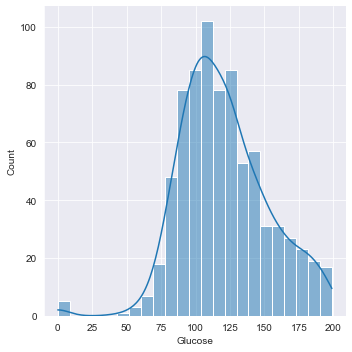

In [56]:
#measures of central tendency 
sns.displot(df_pima.Glucose,kde=True)
plt.show()

In [57]:
# for glucose data is normally distributed so the central tendency will be mean.
df_pima.Glucose.mean()

120.89453125

In [68]:
#Outcome is a catgorical column so the central tendency will be mode
df_pima=df_pima.astype({'Outcome':'category'}) 
df_pima.Outcome.mode()

0    0
Name: Outcome, dtype: category
Categories (2, int64): [0, 1]

In [52]:
#mode for outcome
df_pima.Outcome.mode()

0    0
dtype: int64

3. Please provide 5 points data summaries for required columns?

In [ ]:
#5 point summary is minimum, maximum, Q1, median and Q3

In [43]:
df_pima.min()

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

In [44]:
df_pima.max()

Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness                99.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                       1.00
dtype: float64

In [49]:
df_pima.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [51]:
def cal_Q1_Q3(column,Q):
    result=0
    if Q=='Q1':            
        result = np.quantile(df_pima[column], 0.25)
    elif Q=='Q3':
        result = np.quantile(df_pima[column], 0.75)
    else:
        pass
    print(result)

In [52]:
#Q1
for column in df_pima:
    cal_Q1_Q3(column,'Q1')

1.0
99.0
62.0
0.0
0.0
27.3
0.24375
24.0
0.0


In [53]:
#Q3
for column in df_pima:
    cal_Q1_Q3(column,'Q3')

6.0
140.25
80.0
32.0
127.25
36.6
0.62625
41.0
1.0


4. Please create an appropriate plot to examine the relationship between Age and Glucose.

Text(0, 0.5, 'Age')

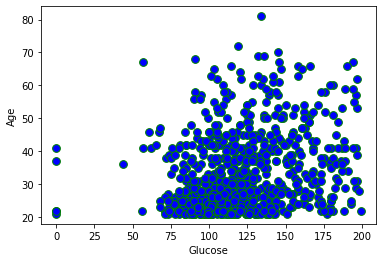

In [24]:
#scatter plot for relationship
plt.scatter(df_pima.Glucose,df_pima.Age, marker='o',c ="blue",edgecolor ="green",  s = 60); 
plt.xlabel("Glucose")
plt.ylabel("Age")

5. Please create an appropriate plot to see the distribution of Outcome variable?

C:\Users\somya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome'>

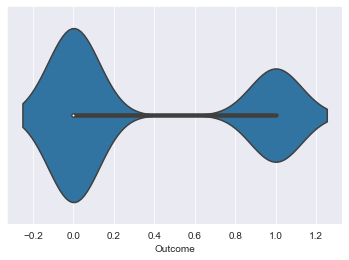

In [9]:
sns.set_style('darkgrid')
sns.violinplot(df_pima.Outcome,orient="h")

6. Please examine the distribution of numerical data and explain which variable normally distributed and which variable is seems to be skewed. Please also tell the direction of skewness.

In [24]:
#function for creating plot
def distribution( column):    
    sns.displot(column,kde=True)
    plt.show()

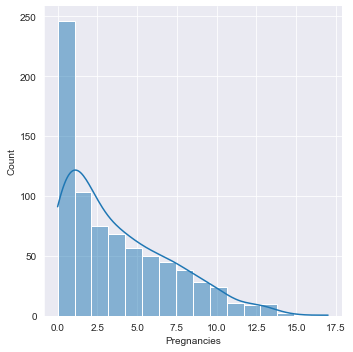

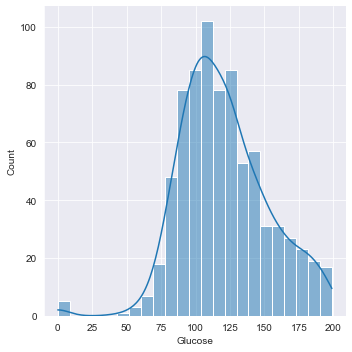

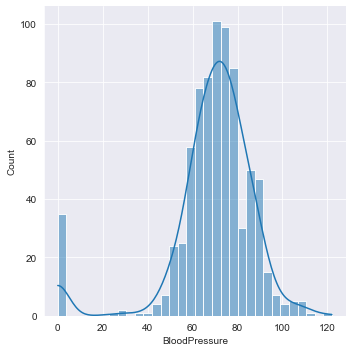

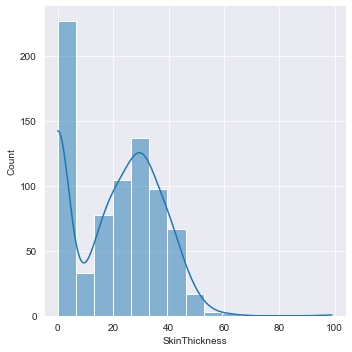

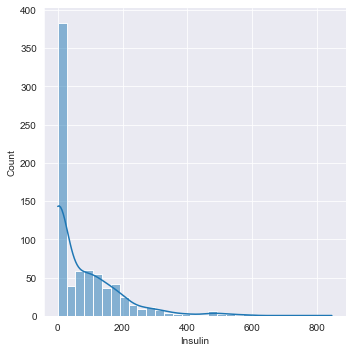

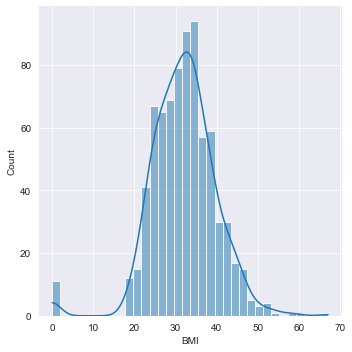

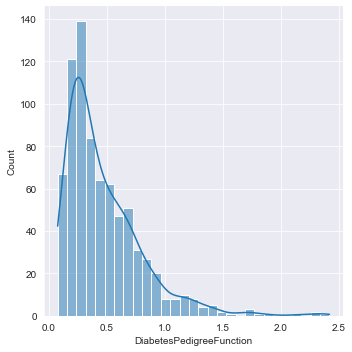

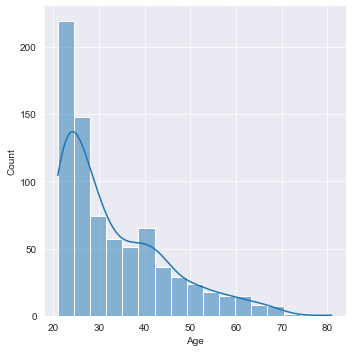

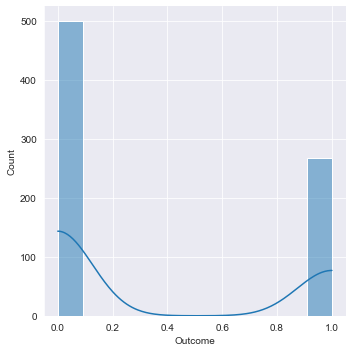

In [25]:
#to see multiple distribution using loop
for column in df_pima:
    distribution(df_pima[column])

Data Distribution:

    Pregnancies-Right Skewed
    Glucose- normally distributed
    BloodPressure- Left Skewed
    Skin Thickness- Right Skewed
    Insulin- Right Skewed
    BMI- Normal Distributed
    DiabetesPedigreeFunction-Right Skewed
    Age-Right Skewed
    
    

7. Please calculate the skewness value and divide variables into symmetrical, moderately skewed and highly skewed.

In [35]:
df_pima.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

    Highly skewed distribution: If the skewness value is less than −1 or greater than +1.

    Moderately skewed distribution: If the skewness value is between −1 and −0.5 or between +0.5 and +1.

    Symmetric distribution: If the skewness value is between −0.5 and +0.5
    
     Pregnancies :  Moderately skewed
     Glucose:  Symmetric distribution
     BloodPressure  :   Highly skewed
     SkinThickness  :   Symmetric distribution       
     Insulin        :   Highly skewed       
     BMI            :   Symmetric distribution     
     DiabetesPedigreeFunction   : Highly skewed
     Age   :  Highly skewed    

8. Please create appropriate plot to examine the outliers of these variables. Please name the variables which have outliers.

In [105]:

def BoxPlotOutliners( column):    
    #plot = sns.distplot(column,vertical=False,hist=False,color='purple', rug=True)
    sns.boxplot(column,orient="h")
    plt.show()

C:\Users\somya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


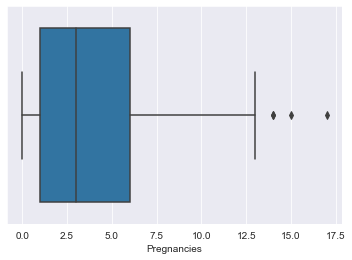

C:\Users\somya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


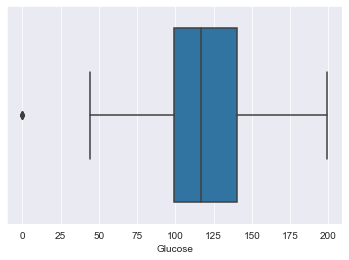

C:\Users\somya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


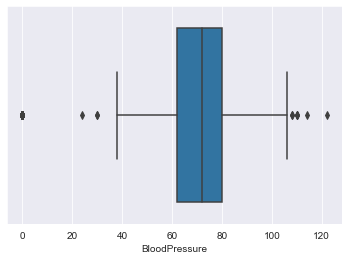

C:\Users\somya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


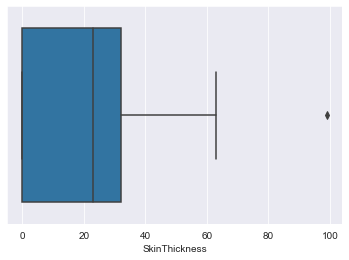

C:\Users\somya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


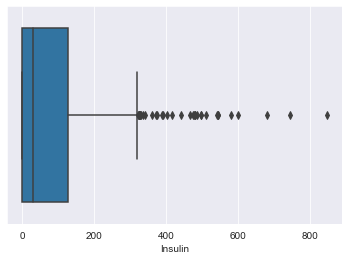

C:\Users\somya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


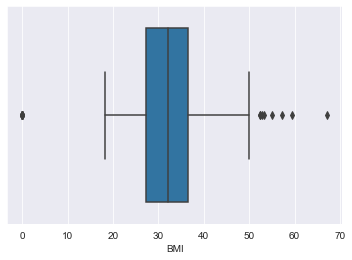

C:\Users\somya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


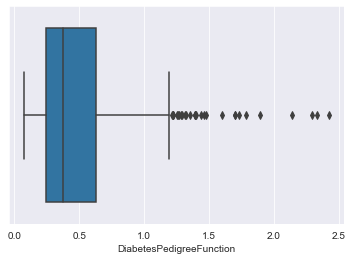

C:\Users\somya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


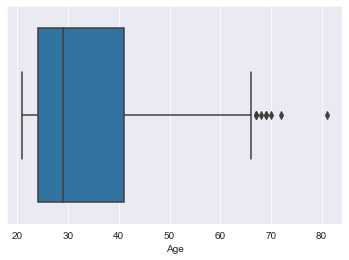

C:\Users\somya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


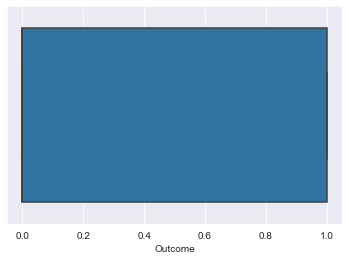

In [107]:
for column in df_pima:
    BoxPlotOutliners(df_pima[column]) 
 

Variables Which have outliners:

    Pregnancies
    Glucose
    BloodPressure
    SkinThickness
    Insuline
    BMI
    DiabetesPedigreeFunction
    Age
    

9. What should be the measures of central tendency and dispersion for skewed data?  

    Median is the best measure of central tendency for skewed data.

In [111]:
df_pima.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [47]:
def IQRCalculate(column):  # calculating measure of dispersion for skewed data
    Q3 = np.quantile(df_pima[column], 0.75)
    Q1 = np.quantile(df_pima[column], 0.25)
    IQR = Q3 - Q1
    print(IQR)

In [48]:
for column in df_pima:
    IQRCalculate(column)

5.0
41.25
18.0
32.0
127.25
9.3
0.38249999999999995
17.0
1.0
